# Decision tree classification
understanding how to use scikit-learn library

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# for visualize decision tree
import graphviz
import pydotplus
from IPython.display import Image
from six import StringIO
import matplotlib.pyplot as plt

In [2]:
""" load data """
iris_df = sns.load_dataset('iris')
iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
""" check validity """
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


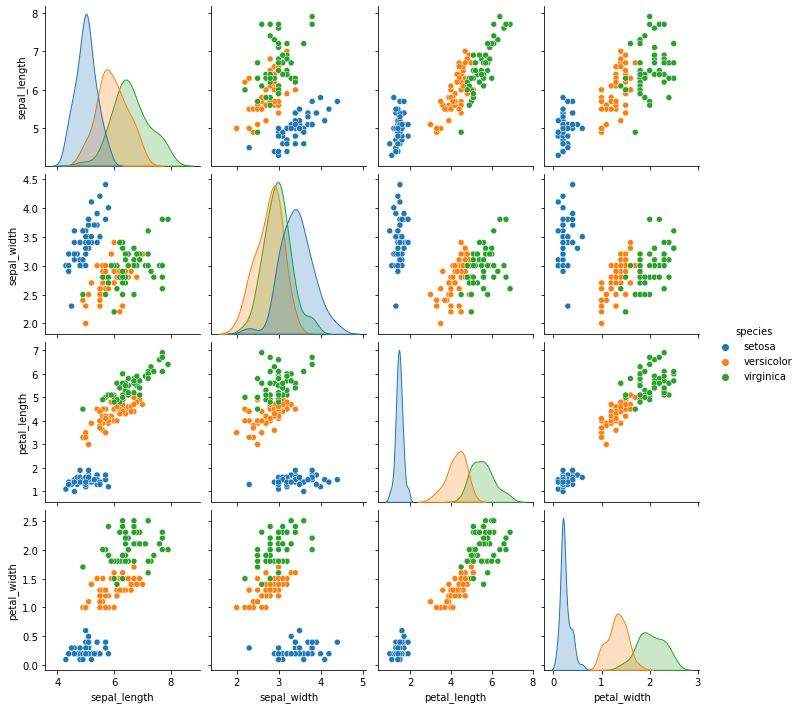

In [6]:
sns.pairplot(iris_df, hue='species')

In [43]:
from sklearn.preprocessing import LabelEncoder
spcs_encoder = LabelEncoder()
iris_df['species'] = spcs_encoder.fit_transform(iris_df['species'].values)

In [45]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
train_df, test_df = train_test_split(iris_df, test_size=0.2, shuffle=True)

In [48]:
""" set training data """
train_input  = train_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
train_target = train_df[['species']]

""" set testing data """
test_input  = test_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
test_target = test_df[['species']]

In [49]:
train_input

,sepal_length,sepal_width,petal_length,petal_width
67,5.8,2.7,4.1,1.0
149,5.9,3.0,5.1,1.8
121,5.6,2.8,4.9,2.0
107,7.3,2.9,6.3,1.8
4,5.0,3.6,1.4,0.2
...,...,...,...,...
83,6.0,2.7,5.1,1.6
140,6.7,3.1,5.6,2.4
46,5.1,3.8,1.6,0.2
112,6.8,3.0,5.5,2.1


In [50]:
train_target

,species
67,1
149,2
121,2
107,2
4,0
...,...
83,1
140,2
46,0
112,2


In [51]:
""" construct classifier model """
tree = DecisionTreeClassifier()
""" training """
tree = tree.fit(train_input, train_target)

<class 'list'>


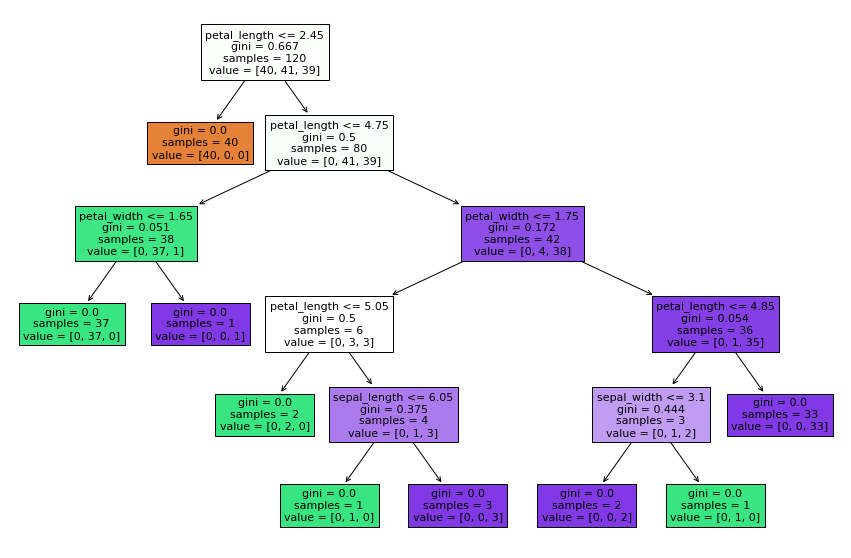

In [52]:
""" visualize model """
plt.figure(figsize=(15, 10))
a = plot_tree(tree, feature_names=iris_df.columns, filled=True)
print(type(a))

In [53]:
print('depth', tree.get_depth())
print('n_leaves', tree.get_n_leaves())
print('params', tree.get_params())

depth 5
n_leaves 9
params {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [54]:
""" testing """
test_out = tree.predict(test_input)

In [55]:
print(test_out)

[2 2 1 2 2 2 0 1 0 0 1 0 0 1 2 1 1 1 0 1 1 0 0 1 0 2 0 2 2 2]


In [56]:
test_target_ = test_target.values.flatten()
print(test_target_)

[2 2 1 2 2 2 0 2 0 0 1 0 0 1 2 1 1 1 0 1 1 0 0 1 0 2 0 2 2 2]


In [62]:
def concordance_rate(target, output):
    if len(target) != len(output):
        raise Exception
    
    n_all = len(target)
    n_correct = 0
    for i in range(n_all):
        if target[i] == output[i]:
            n_correct += 1
            
    ratio = n_correct / n_all
    return ratio

In [63]:
ratio = concordance_rate(test_target_, test_out)
print(ratio)

0.9666666666666667


In [66]:
tree.score(test_input, test_target)

0.9666666666666667

In [67]:
tree.apply(test_input)

array([16, 16,  4, 16, 16, 16,  1,  8,  1,  1,  4,  1,  1,  8, 16,  4,  4,
        4,  1,  4,  4,  1,  1,  8,  1, 16,  1, 16, 16, 16])